In [27]:
import numpy as np
import matplotlib.pyplot as plt
from kwave.utils.signals import tone_burst
from kwave.utils.mapgen import make_cart_circle
from kwave.utils.matrix import expand_matrix
from kwave.kgrid import kWaveGrid
from kwave.kmedium import kWaveMedium
from kwave.ksource import kSource
from kwave.kspaceFirstOrder3D import kspaceFirstOrder3D
from kwave.ktransducer import kSensor, kWaveTransducerSimple
from kwave.options.simulation_execution_options import SimulationExecutionOptions
from kwave.options.simulation_options import SimulationOptions

In [2]:
# 定义模拟参数
Nx = 128  # 网格点数 x
Ny = 128  # 网格点数 y
Nz = 128  # 网格点数 z
dx = 0.1e-3  # 网格间距 (m)
dy = 0.1e-3  # 网格间距 (m)
dz = 0.1e-3  # 网格间距 (m)

In [3]:
# 创建网格
kgrid = kWaveGrid([Nx, Ny, Nz], [dx, dy, dz])

In [4]:
# 定义介质属性
medium = kWaveMedium(sound_speed=1500)

In [34]:
# 定义环形阵列参数
radius = 20  # 环形阵列半径 (网格点数)
num_elements = 4  # 环形阵列元素数量
element_width = radius/num_elements  # 阵列元素宽度 (网格点数)

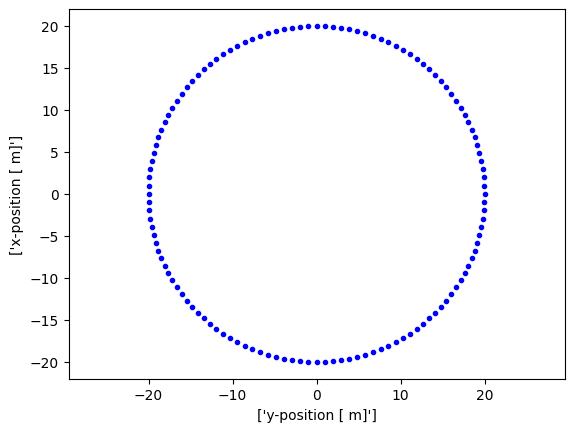

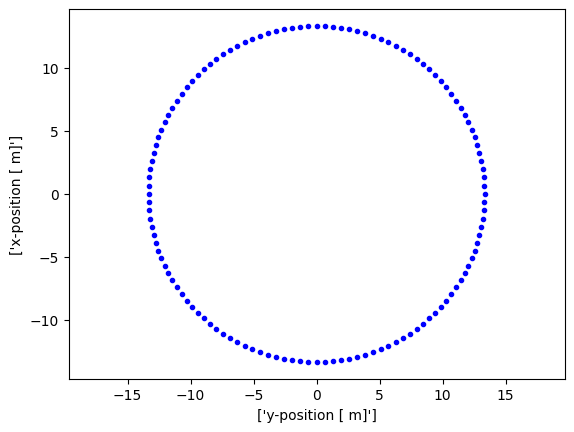

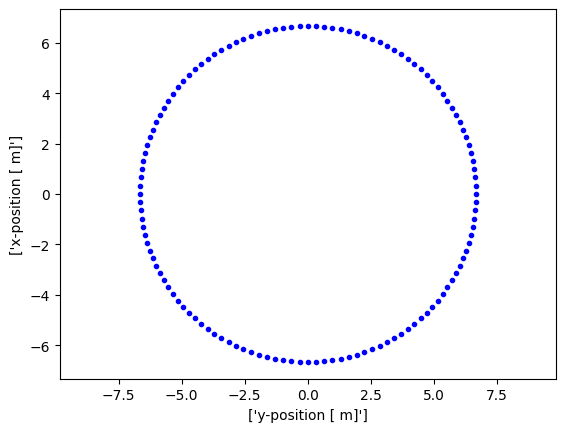

In [36]:
# ... 前面代码保持不变 ...

# 创建环形阵列
from kwave.data import Vector  # 导入 Vector 类
source_mask = np.zeros((Nx, Ny, Nz))
for i in range(num_elements):
    angle = 2 * np.pi * i / num_elements
    x = int(Nx / 2 + radius * np.cos(angle))
    y = int(Ny / 2 + radius * np.sin(angle))
    # 将 Nx 和 Ny 转换为 Vector 类型
    grid_size = Vector([Nx, Ny])
    center = Vector([0, 0])
    # 创建每个元素
    r = radius-element_width/2*i
    element = make_cart_circle(num_points=Nx, center_pos=center, radius=r,plot_circle=True)
    #source_mask[:, :, int(Nz / 2)] = source_mask[:, :, int(Nz / 2)] + element

# ... 后面代码保持不变 ...

In [ ]:
element[10]

In [21]:
# 定义聚焦点
focus_point = [Nx / 2, Ny / 2, Nz / 2]  # 聚焦点坐标 (网格点数)

In [ ]:
# 计算每个元素到聚焦点的距离
source_positions = np.argwhere(source_mask)
distances = np.linalg.norm(source_positions - focus_point, axis=1)

In [23]:
# 计算每个元素的延迟时间
delays = distances / medium.sound_speed

In [ ]:
# 生成激励信号
tone_burst_freq = 1e6  # 激励信号频率 (Hz)
tone_burst_cycles = 5  # 激励信号周期数
source_signal = tone_burst(1 / dx / 2, tone_burst_freq, tone_burst_cycles)

In [ ]:
# 创建源
source = kSource()
source.p_mask = source_mask
source.p = expand_matrix(source_signal, source_mask)

In [ ]:
# 定义传感器
sensor_mask = np.zeros((Nx, Ny, Nz))
sensor_mask[int(Nx / 2), int(Ny / 2), :] = 1
sensor = kSensor(sensor_mask)

In [ ]:
# 设置模拟选项
simulation_options = SimulationOptions(
    pml_inside=False,
    pml_size=20,
    data_cast='single',
    save_to_disk=False
)

In [ ]:
# 设置执行选项
execution_options = SimulationExecutionOptions()

In [ ]:
# 运行模拟
sensor_data = kspaceFirstOrder3D(
    kgrid,
    medium,
    source,
    sensor,
    simulation_options,
    execution_options
)

# Visualization

In [ ]:
# 绘制结果
plt.figure()
plt.plot(sensor_data)
plt.xlabel('Time step')
plt.ylabel('Pressure (Pa)')
plt.title('Pressure at the focus point')
plt.show()